In [1]:
%matplotlib inline
import pandas as pd                # 데이터를 저장하고 처리하는 패키지
import matplotlib as mpl           # 그래프를 그리는 패키지
import matplotlib.pyplot as plt    # 그래프를 그리는 패키지
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
인구 = pd.read_csv('인구.csv',encoding='CP949')
인구밀도 = pd.read_csv('인구밀도.csv',encoding='CP949')
GDP = pd.read_csv('GDP.csv',encoding='CP949')
출산율 = pd.read_csv('출산율.csv',encoding='CP949')
정부지출 = pd.read_csv('정부지출.csv',encoding='CP949')
사망률 = pd.read_csv('사망률.csv',encoding='CP949')
맥도날드 = pd.read_csv("McDonald's.csv",encoding='CP949')
스타벅스 = pd.read_csv('starbucks.csv',encoding='CP949')
미국면적 = pd.read_csv('미국 면적.csv',encoding='CP949')
미국인구 = pd.read_csv('미국 인구.csv',encoding='CP949')
미국집값상승률 = pd.read_csv('미국 집값 상승률.csv',encoding='CP949')
미국GDP = pd.read_csv('미국GDP.csv',encoding='CP949')
미국PCPI = pd.read_csv('미국PCPI.csv',encoding='CP949')
미국집값 = pd.read_csv('미국 집값.csv',encoding='CP949')
미국집값=미국집값.set_index('state')
미국집값상승률=미국집값상승률.set_index('state')
미국GDP=미국GDP.set_index('state')
미국PCPI=미국PCPI.set_index('state')
스타벅스=스타벅스.set_index('state')
맥도날드=맥도날드.set_index('state')
미국면적=미국면적.set_index('state')
미국인구=미국인구.set_index('state')
인구=인구.set_index('Country Name')
인구밀도=인구밀도.set_index('Country Name')#한 사람당 면적
GDP=GDP.set_index('Country Name')#millon
사망률=사망률.set_index('Country Name')#1000명당
정부지출=정부지출.set_index('Country Name')#millon
출산율=출산율.set_index('Country Name')#1000명당
인구=인구.drop(['Country Code','Indicator Name','Indicator Code'],axis=1)
인구밀도=인구밀도.drop(['Country Code','Indicator Name','Indicator Code'],axis=1)
GDP=GDP.drop(['Country Code','Indicator Name','Indicator Code'],axis=1)
사망률=사망률.drop(['Country Code','Indicator Name','Indicator Code'],axis=1)
정부지출=정부지출.drop(['Country Code','Indicator Name','Indicator Code'],axis=1)
출산율=출산율.drop(['Country Code','Indicator Name','Indicator Code'],axis=1)

미국집값상승률1=미국집값상승률[미국집값상승률['period']=='2020-Q4']
미국집값상승률2=미국집값상승률[미국집값상승률['period']=='2010-Q4']
미국집값상승률=pd.DataFrame(미국집값상승률1['index_sa']-미국집값상승률2['index_sa'])
미국데이터= pd.concat([(미국인구['population']),(미국면적['km2']),(미국집값상승률['index_sa']),미국GDP['2018-Q1']],axis=1)
미국데이터['pcpi']=미국PCPI['2018']/미국인구['population']
미국데이터['인구밀도']=미국데이터['population']/미국데이터['km2']
미국데이터['미국집값']=미국집값['single-family']
미국데이터['면적당스타벅스']=스타벅스['value']/미국데이터['km2']
미국데이터['인구당스타벅스']=스타벅스['value']/미국데이터['population']
미국데이터['면적당맥도날드']=맥도날드["McDonald's"]/미국데이터['km2']
미국데이터['인구당맥도날드']=맥도날드["McDonald's"]/미국데이터['population']

In [3]:
plt.rcParams["figure.figsize"] = (10,10)


In [4]:
(정부지출['2018']*1000000/인구['2018']).dropna().sort_values()


Country Name
World                     0.002244
IDA & IBRD total          0.002373
Low & middle income       0.002387
Middle income             0.002670
IBRD only                 0.003247
                          ...     
Faroe Islands           594.627771
Kiribati                637.706945
Greenland               787.715641
Marshall Islands        964.645747
Palau                  1850.792581
Name: 2018, Length: 211, dtype: float64

<AxesSubplot:>

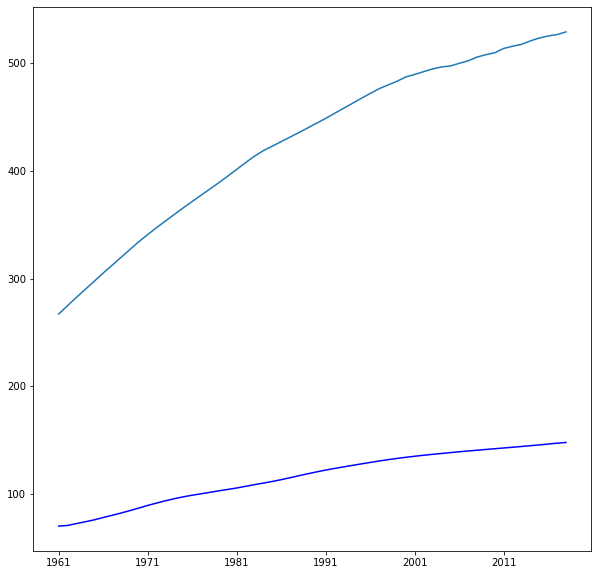

In [5]:
#출산율.loc['Korea, Rep.'].dropna().astype(float).plot()
#사망률.loc['Korea, Rep.'].dropna().astype(float).plot()
(인구밀도.loc['Korea, Rep.']).dropna().astype(float).plot()
(인구밀도.loc['China']).dropna().astype(float).plot(color='b')

In [6]:
인구=인구.loc[['Slovenia','Lithuania','Russian Federation','Romania','Argentina','Estonia','Latvia','Slovak Republic','Finland','Hungary','Mexico','Czech Republic','Bulgaria','Turkey','Germany','Austria','Brazil','Netherlands','Chile','Switzerland','Denmark','United Kingdom','Italy','South Africa','Sweden','Japan','Spain','Belgium','United States','Canada','Portugal','Israel','France','Poland','Colombia','Norway','China','New Zealand','Greece','India','Indonesia','Ireland','Australia','Korea, Rep.']]
GDP=GDP.loc[['Slovenia','Lithuania','Russian Federation','Romania','Argentina','Estonia','Latvia','Slovak Republic','Finland','Hungary','Mexico','Czech Republic','Bulgaria','Turkey','Germany','Austria','Brazil','Netherlands','Chile','Switzerland','Denmark','United Kingdom','Italy','South Africa','Sweden','Japan','Spain','Belgium','United States','Canada','Portugal','Israel','France','Poland','Colombia','Norway','China','New Zealand','Greece','India','Indonesia','Ireland','Australia','Korea, Rep.']]
인구['2018']

Country Name
Slovenia              2.073894e+06
Lithuania             2.801543e+06
Russian Federation    1.444779e+08
Romania               1.947254e+07
Argentina             4.449450e+07
Estonia               1.321977e+06
Latvia                1.927174e+06
Slovak Republic       5.446771e+06
Finland               5.515525e+06
Hungary               9.775564e+06
Mexico                1.261908e+08
Czech Republic        1.062993e+07
Bulgaria              7.025037e+06
Turkey                8.231972e+07
Germany               8.290578e+07
Austria               8.840521e+06
Brazil                2.094693e+08
Netherlands           1.723162e+07
Chile                 1.872916e+07
Switzerland           8.514329e+06
Denmark               5.793636e+06
United Kingdom        6.646034e+07
Italy                 6.042176e+07
South Africa          5.777962e+07
Sweden                1.017521e+07
Japan                 1.265291e+08
Spain                 4.679775e+07
Belgium               1.142705e+07
United 

c:\users\ksy\anaconda3\envs\py368\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


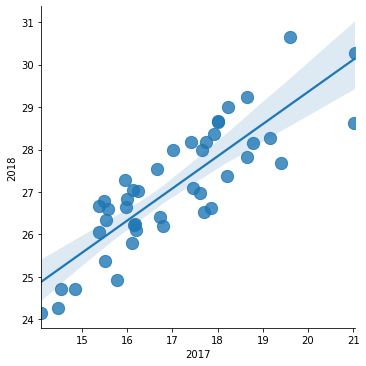

In [7]:
data = pd.concat([np.log(인구['2017']),np.log(GDP['2018'])],axis=1)
data=data.loc[['Argentina','Australia','Austria','Belgium','Brazil','Bulgaria','Canada','Chile','China','Colombia','Czech Republic','Denmark','Estonia','Finland','France','Germany','Greece','Hungary','India','Indonesia','Ireland','Israel','Italy','Japan','Korea, Rep.','Latvia','Lithuania','Mexico','Netherlands','New Zealand','Norway','Poland','Portugal','Romania','Russian Federation','Slovak Republic','Slovenia','South Africa','Spain','Sweden','Switzerland','Turkey','United Kingdom','United States']]
sns.lmplot('2017','2018',data=data,fit_reg=True,scatter_kws={"s":150})

c:\users\ksy\anaconda3\envs\py368\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


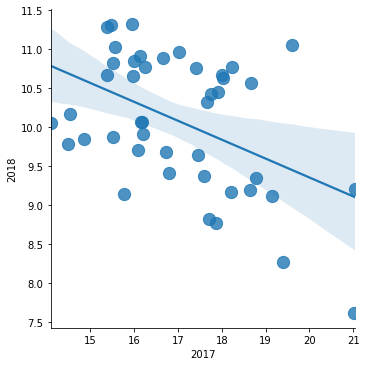

In [8]:
data = pd.concat([(인구['2017']),(GDP['2018'])],axis=1)
data=data.loc[['Argentina','Australia','Austria','Belgium','Brazil','Bulgaria','Canada','Chile','China','Colombia','Czech Republic','Denmark','Estonia','Finland','France','Germany','Greece','Hungary','India','Indonesia','Ireland','Israel','Italy','Japan','Korea, Rep.','Latvia','Lithuania','Mexico','Netherlands','New Zealand','Norway','Poland','Portugal','Romania','Russian Federation','Slovak Republic','Slovenia','South Africa','Spain','Sweden','Switzerland','Turkey','United Kingdom','United States']]
data['2018']=np.log(data['2018']/data['2017'])
data['2017']=np.log(data['2017'])
sns.lmplot('2017','2018',data=data,fit_reg=True,scatter_kws={"s":150})

미국 데이터

c:\users\ksy\anaconda3\envs\py368\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


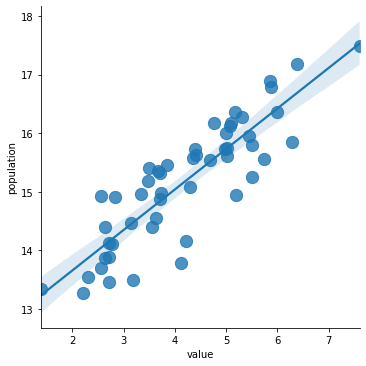

In [9]:
data = pd.concat([np.log(스타벅스['value']),np.log(미국인구['population'])],axis=1)
sns.lmplot("value",'population',data=data,fit_reg=True,scatter_kws={"s":150})

c:\users\ksy\anaconda3\envs\py368\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


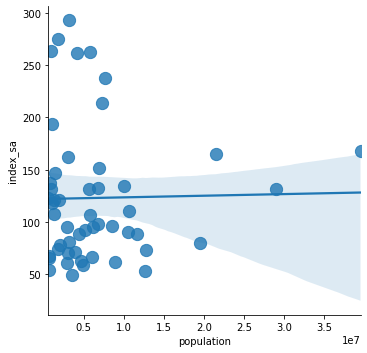

In [10]:
data = pd.concat([(미국인구['population']),(미국집값상승률['index_sa'])],axis=1)
sns.lmplot('population','index_sa',data=data,fit_reg=True,scatter_kws={"s":150})

In [11]:
미국데이터['면적당스타벅스']=스타벅스['value']/미국데이터['km2']
미국데이터['인구당스타벅스']=스타벅스['value']/미국데이터['population']
미국데이터['면적당맥도날드']=맥도날드["McDonald's"]/미국데이터['km2']
미국데이터['인구당맥도날드']=맥도날드["McDonald's"]/미국데이터['population']
미국데이터['면적당맥도날드'].sort_values()

Alaska            0.000018
Wyoming           0.000095
Montana           0.000109
North Dakota      0.000123
South Dakota      0.000148
Idaho             0.000234
New Mexico        0.000255
Nebraska          0.000357
Utah              0.000418
Nevada            0.000450
Oregon            0.000611
Colorado          0.000674
Kansas            0.000694
Arizona           0.000721
Maine             0.000726
Oklahoma          0.000872
Iowa              0.000906
Arkansas          0.000942
Minnesota         0.000984
Mississippi       0.001020
Vermont           0.001215
Texas             0.001233
West Virginia     0.001446
Washington        0.001458
Alabama           0.001601
Missouri          0.001679
Louisiana         0.002020
Wisconsin         0.002032
Kentucky          0.002161
South Carolina    0.002312
Georgia           0.002450
Tennessee         0.002669
New Hampshire     0.002674
California        0.002887
North Carolina    0.002970
Indiana           0.003513
Michigan          0.003722
V

c:\users\ksy\anaconda3\envs\py368\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\ksy\anaconda3\envs\py368\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\ksy\anaconda3\envs\py368\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\ksy\anaconda3\envs\py368\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45817 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\ksy\anaconda3\envs\py368\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 

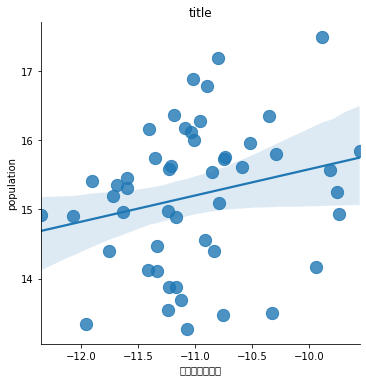

In [12]:
data = pd.concat([np.log(미국데이터['인구당스타벅스']),np.log(미국데이터['population'])],axis=1)
data.drop(data.index[8],inplace=True)
g=sns.lmplot('인구당스타벅스','population',data=data,fit_reg=True,scatter_kws={"s":150})
#g = (g.set_axis_labels("인구밀도","index_sa").set(xlim=(0,6500),ylim=(0,500)))
plt.title("title")
plt.show(g)

c:\users\ksy\anaconda3\envs\py368\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\ksy\anaconda3\envs\py368\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47732 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\ksy\anaconda3\envs\py368\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\ksy\anaconda3\envs\py368\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45817 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\ksy\anaconda3\envs\py368\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 

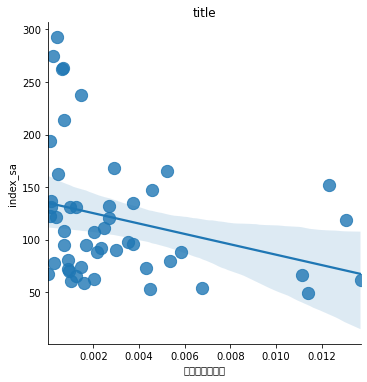

In [13]:
data = pd.concat([(미국데이터['면적당맥도날드']),(미국집값상승률['index_sa'])],axis=1)
data.drop(data.index[8],inplace=True)
g=sns.lmplot('면적당맥도날드','index_sa',data=data,fit_reg=True,scatter_kws={"s":150})
#g = (g.set_axis_labels("인구밀도","index_sa").set(xlim=(0,6500),ylim=(0,500)))
plt.title("title")
plt.show(g)

In [14]:
미국데이터

,population,km2,index_sa,2018-Q1,pcpi,인구밀도,미국집값,면적당스타벅스,인구당스타벅스,면적당맥도날드,인구당맥도날드
Alabama,4903185,131171,59.00,197154.4,0.042575,37.380099,146534.0,0.000252,0.000007,0.001601,0.000043
Alaska,731545,1477953,67.41,52871.3,0.060652,0.494972,311194.0,0.000016,0.000033,0.000018,0.000037
Arizona,7278717,294207,213.65,311712.7,0.043857,24.740122,290075.0,0.000836,0.000034,0.000721,0.000029
Arkansas,3017825,134771,70.46,116118.2,0.043209,22.392243,131577.0,0.000096,0.000004,0.000942,0.000042
California,39512223,403466,168.12,2680610.4,0.063639,97.931977,346944.0,0.004967,0.000051,0.002887,0.000029
Colorado,5758736,268431,262.82,339705.9,0.058206,21.453319,422369.0,0.001166,0.000054,0.000674,0.000031
Connecticut,3565287,12542,49.48,249589.4,0.074986,284.267820,278008.0,0.005820,0.000020,0.011402,0.000040
Delaware,705749,5047,53.96,62349.7,0.072410,139.835348,264627.0,0.002972,0.000021,0.006737,0.000048
D.C,973764,158,263.22,121744.9,0.058531,6163.063291,NaN,0.386076,0.000063,1.588608,0.000258
Florida,21477737,138887,165.39,929250.0,0.050410,154.641810,266350.0,0.002527,0.000016,0.005242,0.000034


c:\users\ksy\anaconda3\envs\py368\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47732 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\ksy\anaconda3\envs\py368\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\ksy\anaconda3\envs\py368\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45817 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\ksy\anaconda3\envs\py368\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\ksy\anaconda3\envs\py368\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\ksy\anaconda3\envs\py368\lib\site-packages\matplotlib\backends\backend_

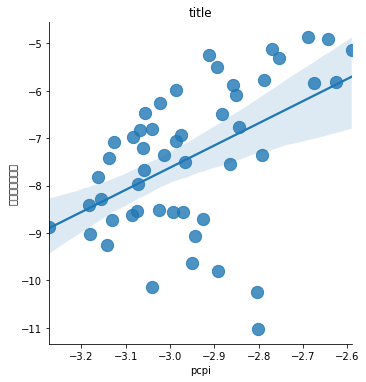

In [17]:
data = pd.concat([np.log(미국데이터['pcpi']),np.log(미국데이터['면적당스타벅스'])],axis=1)
data.drop(data.index[8],inplace=True)
g=sns.lmplot('pcpi','면적당스타벅스',data=data,fit_reg=True,scatter_kws={"s":150})
#g = (g.set_axis_labels("인구밀도","index_sa").set(xlim=(0,6500),ylim=(0,500)))
plt.title("title")
plt.show(g)

c:\users\ksy\anaconda3\envs\py368\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


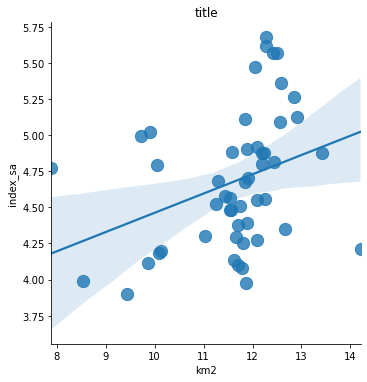

In [18]:
data = pd.concat([np.log(미국데이터['km2']),np.log(미국집값상승률['index_sa'])],axis=1)
data.drop(data.index[8],inplace=True)
g=sns.lmplot('km2','index_sa',data=data,fit_reg=True,scatter_kws={"s":150})
#g = (g.set_axis_labels("인구밀도","index_sa").set(xlim=(0,6500),ylim=(0,500)))
plt.title("title")
plt.show(g)

c:\users\ksy\anaconda3\envs\py368\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\ksy\anaconda3\envs\py368\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\ksy\anaconda3\envs\py368\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\ksy\anaconda3\envs\py368\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\ksy\anaconda3\envs\py368\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 

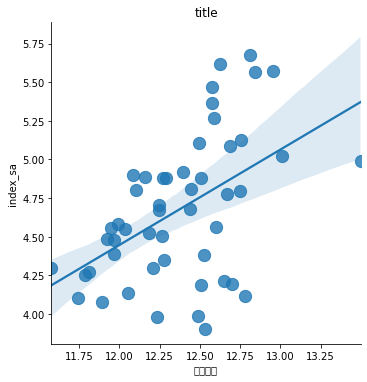

In [19]:
data = pd.concat([np.log(미국데이터['미국집값']),np.log(미국집값상승률['index_sa'])],axis=1)
data.drop(data.index[8],inplace=True)
g=sns.lmplot('미국집값','index_sa',data=data,fit_reg=True,scatter_kws={"s":150})
#g = (g.set_axis_labels("인구밀도","index_sa").set(xlim=(0,6500),ylim=(0,500)))
plt.title("title")
plt.show(g)

c:\users\ksy\anaconda3\envs\py368\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


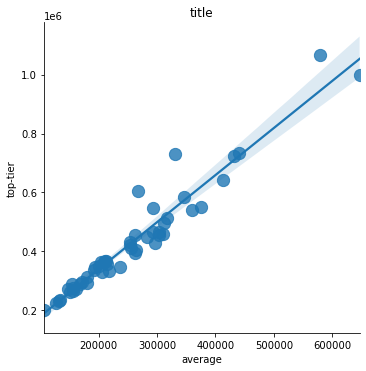

In [20]:
data = pd.concat([(미국집값['average']),(미국집값['top-tier'])],axis=1)
data.drop(data.index[8],inplace=True)
g=sns.lmplot('average','top-tier',data=data,fit_reg=True,scatter_kws={"s":150})
#g = (g.set_axis_labels("인구밀도","index_sa").set(xlim=(0,6500),ylim=(0,500)))
plt.title("title")
plt.show(g)

c:\users\ksy\anaconda3\envs\py368\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\ksy\anaconda3\envs\py368\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\ksy\anaconda3\envs\py368\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\ksy\anaconda3\envs\py368\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\ksy\anaconda3\envs\py368\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 

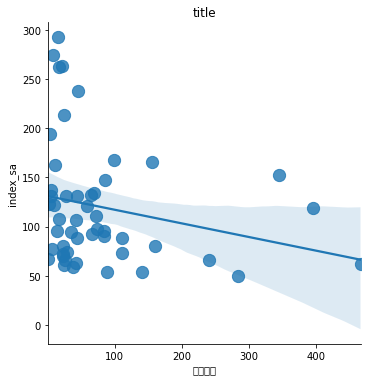

In [21]:
data = pd.concat([(미국데이터['인구밀도']),(미국데이터['index_sa'])],axis=1)
data.drop(data.index[8],inplace=True)
g=sns.lmplot('인구밀도','index_sa',data=data,fit_reg=True,scatter_kws={"s":150})
#g = (g.set_axis_labels("인구밀도","index_sa").set(xlim=(0,6500),ylim=(0,500)))
plt.title("title")
plt.show(g)

c:\users\ksy\anaconda3\envs\py368\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\ksy\anaconda3\envs\py368\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\ksy\anaconda3\envs\py368\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\ksy\anaconda3\envs\py368\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\ksy\anaconda3\envs\py368\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 

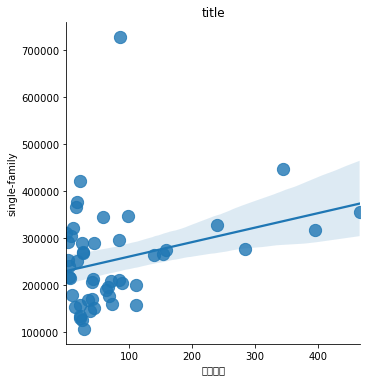

In [22]:
data = pd.concat([(미국데이터['인구밀도']),(미국집값['single-family'])],axis=1)
data.drop(data.index[8],inplace=True)
g=sns.lmplot('인구밀도','single-family',data=data,fit_reg=True,scatter_kws={"s":150})
#g = (g.set_axis_labels("인구밀도","index_sa").set(xlim=(0,6500),ylim=(0,500)))
plt.title("title")
plt.show(g)

c:\users\ksy\anaconda3\envs\py368\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


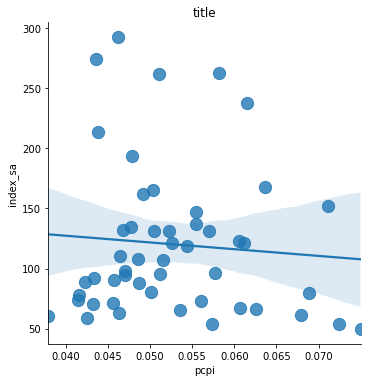

In [25]:
data = pd.concat([(미국데이터['pcpi']),(미국데이터['index_sa'])],axis=1)
data.drop(data.index[8],inplace=True)
g=sns.lmplot('pcpi','index_sa',data=data,fit_reg=True,scatter_kws={"s":150})
#g = (g.set_axis_labels("인구밀도","index_sa").set(xlim=(0,6500),ylim=(0,500)))
plt.title("title")
plt.show(g)

c:\users\ksy\anaconda3\envs\py368\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


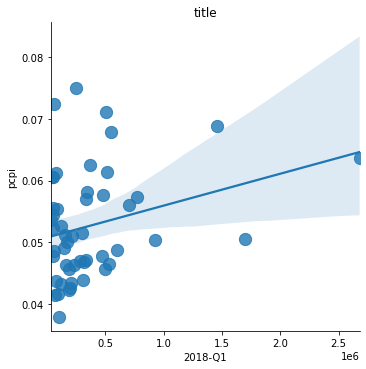

In [24]:
data = pd.concat([(미국데이터['2018-Q1']),(미국데이터['pcpi'])],axis=1)
data.drop(data.index[8],inplace=True)
g=sns.lmplot('2018-Q1','pcpi',data=data,fit_reg=True,scatter_kws={"s":150})
#g = (g.set_axis_labels("인구밀도","index_sa").set(xlim=(0,6500),ylim=(0,500)))
plt.title("title")
plt.show(g)

In [ ]:
alrnrepdl